<a href="https://colab.research.google.com/github/Abdullahshatarh122/Music_Genre_Classification/blob/main/Music_Genre_Classification_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## initialization

In [ ]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'music-genre-classification-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F83334%2F9222329%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240816%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240816T144106Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9d90ff9565dafc028b2851ecc5e2cc2e266c9f53f49fb754dbab54745ef084b063be270252d781581d280af3493e1fa15f87f0cfb6a68ae6c252c50f9594b5f11d59ae3c400d62676fc723f1fef5b634b4707521c2eb9a2d3ab2965abcb49d11f5754edba26604d55d68869f9fc4163330bf1187d57cebc147e55e34744767a0cabf8e797532d0e96ba52b011abbc27d29a085da646223cc3e2d15ce7cbd85a66114f81d0046cfd41fad80b96d04791afa2fe64cefaf58b2ff5a605ec47638f20bc8ba9af948b81c6622f121d4335a8c06263e78450ae3e894d34048c5b762cd7409eb732659d95c617f2e30eadfe28d7f491803e2762a31895d84ea5f903544'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1004886 bytes downloaded
Downloaded and uncompressed: music-genre-classification-2024
Data source import complete.


In [ ]:


import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/music-genre-classification-2024/sample_submission (2).csv
/kaggle/input/music-genre-classification-2024/train (1).csv
/kaggle/input/music-genre-classification-2024/test (2).csv


## Getting the data

In [ ]:
data = pd.read_csv("/kaggle/input/music-genre-classification-2024/train (1).csv")
data_test = pd.read_csv("/kaggle/input/music-genre-classification-2024/test (2).csv")
data.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
ID = data_test['Id']
data.drop(['Id'], axis=1, inplace = True)
data_test.drop(['Id'], axis=1, inplace = True)

In [ ]:
data["Artist Name"].nunique()

7913

In [ ]:
data["Track Name"].nunique()

12455

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

,0
Artist Name,0
Track Name,0
Popularity,333
danceability,0
energy,0
key,1609
loudness,0
mode,0
speechiness,0
acousticness,0


<Axes: >

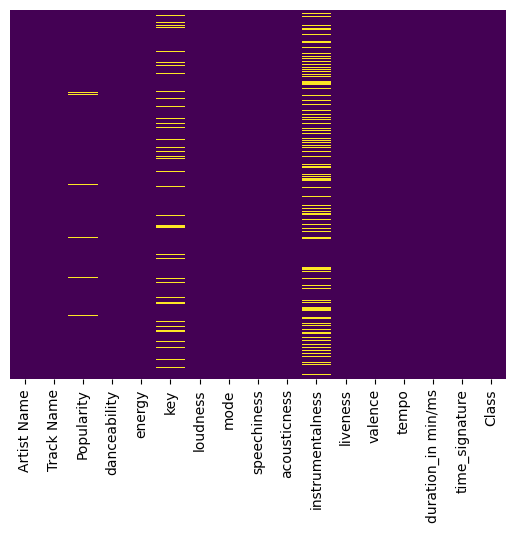

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

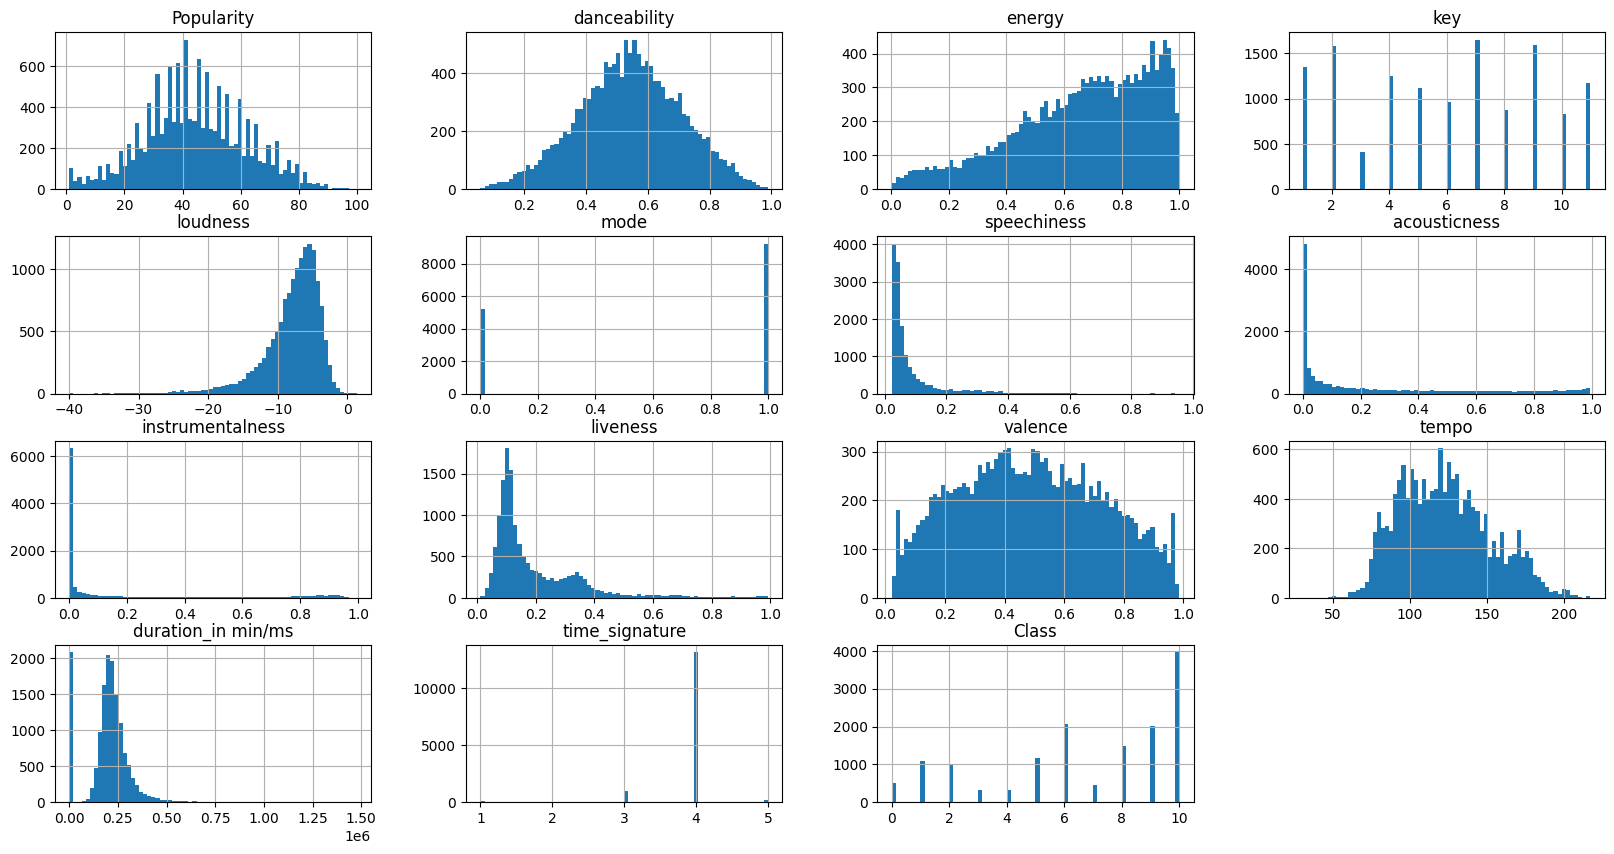

In [ ]:
data.hist(bins=70 , figsize=(20,10))
plt.show()

In [ ]:
# data = data.drop(['instrumentalness'], axis=1)
# data = data.apply(lambda col: col.fillna(col.mean()), axis=0)

## Filling the null values

In [ ]:
data['Popularity'].fillna(data['Popularity'].mean(),inplace = True)

In [ ]:
data["key"].unique()

array([ 9., 11.,  7., nan,  6.,  1.,  5., 10.,  4.,  2.,  3.,  8.])

In [ ]:
data['key'].fillna(data['key'].mode()[0] , inplace = True)

In [ ]:
data["instrumentalness"].nunique() #not discrete values

3945

In [ ]:
data['instrumentalness'].fillna(data['instrumentalness'].median() , inplace = True) #median because skewed data

In [ ]:
data.isna().sum()

,0
Artist Name,0
Track Name,0
Popularity,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0


##handling non numrical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Artist Name' , 'Track Name']

encoder = LabelEncoder()
for col in columns_to_encode:
  data[col] = encoder.fit_transform(data[col])

In [ ]:
data.info()
data_11= data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  int64  
 1   Track Name          14396 non-null  int64  
 2   Popularity          14396 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 14396 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    14396 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [ ]:
data.describe()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,3958.235482,6146.616977,44.525208,0.543105,0.662422,6.070714,-7.900852,0.640247,0.080181,0.246746,0.135278,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,2291.771660,3571.770992,17.216285,0.165517,0.235967,3.033837,4.057362,0.479944,0.085157,0.310922,0.274652,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,0.000000,0.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,1982.750000,3037.000000,33.000000,0.432000,0.508000,4.000000,-9.538000,0.000000,0.034800,0.004280,0.000295,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,3948.500000,6133.500000,44.000000,0.545000,0.699000,7.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,5972.000000,9210.250000,56.000000,0.658000,0.861000,8.000000,-5.162000,1.000000,0.083100,0.432250,0.057600,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,7912.000000,12454.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
#Shuffling the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

## Handling outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

df_excluded = data[['Class']]
df_to_scale = data.drop(columns=["Class"])

df_scaled = pd.DataFrame(robustscaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

df_scaled.reset_index(drop=True, inplace=True)
df_excluded.reset_index(drop=True, inplace=True)

data_robustscaler = pd.concat([df_scaled, df_excluded], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

df_excluded = data[['Class']]
df_to_scale = data.drop(columns=["Class"])

df_scaled = pd.DataFrame(standard_scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

df_scaled.reset_index(drop=True, inplace=True)
df_excluded.reset_index(drop=True, inplace=True)

data_std_scaler = pd.concat([df_scaled, df_excluded], axis=1)



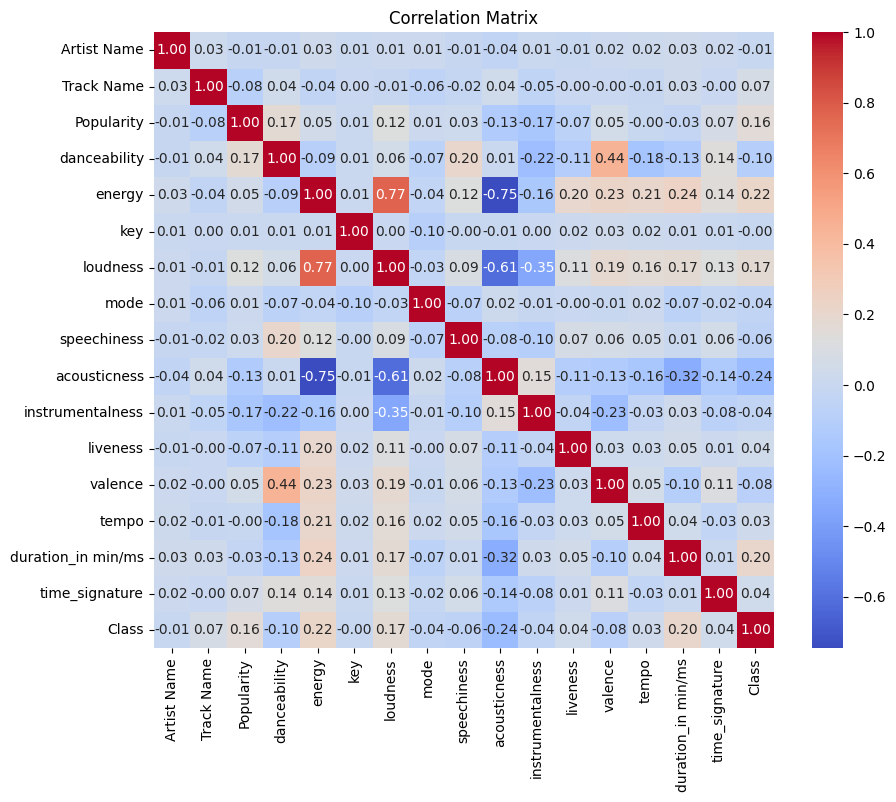

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

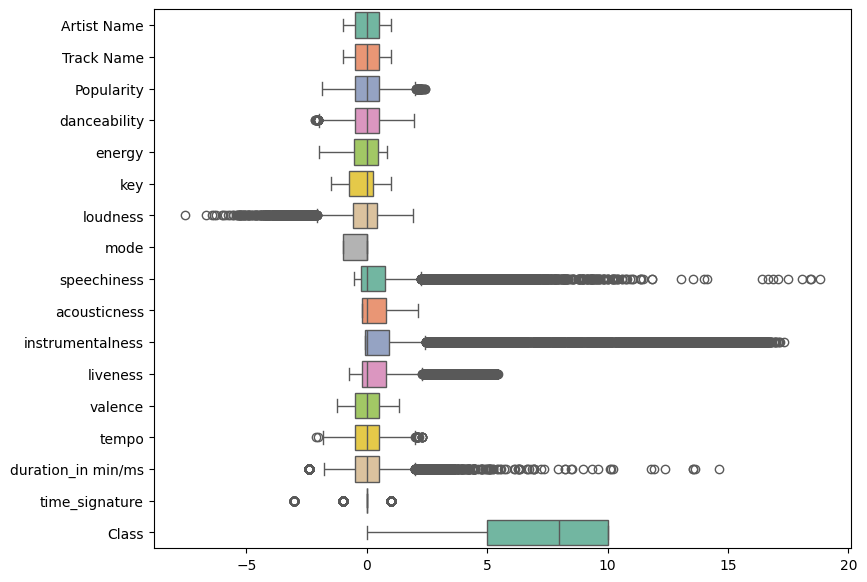

In [ ]:
plt.figure(figsize=(9, 7))
sns.boxplot(data=data_robustscaler, orient="h", palette="Set2")
plt.show()

In [ ]:
def remove_outliers_iqr(df, columns, multiplier=5):
    df_cleaned = df.copy()

    for column in columns:
        if column in df_cleaned.columns:
            q1 = df_cleaned[column].quantile(0.25)
            q3 = df_cleaned[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - multiplier * iqr
            upper_bound = q3 + multiplier * iqr
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

outlier_columns=["loudness","speechiness","instrumentalness","liveness","duration_in min/ms"]
data_robustscaler_filtered = remove_outliers_iqr(data_robustscaler , outlier_columns)
data_std_scaler_filtered = remove_outliers_iqr(data_std_scaler , outlier_columns)

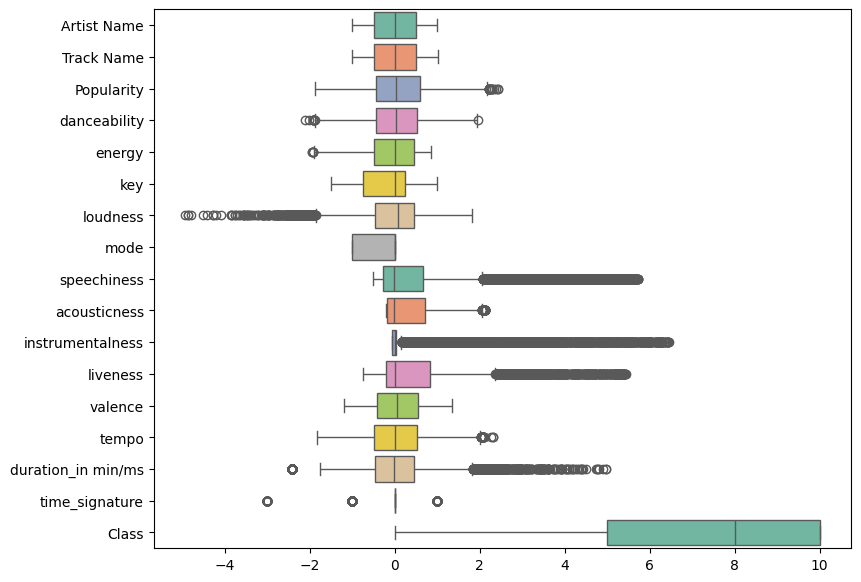

In [ ]:
plt.figure(figsize=(9, 7))
sns.boxplot(data=data_robustscaler_filtered, orient="h", palette="Set2")
plt.show()

In [ ]:
data_robustscaler_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11722 entries, 0 to 14393
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         11722 non-null  float64
 1   Track Name          11722 non-null  float64
 2   Popularity          11722 non-null  float64
 3   danceability        11722 non-null  float64
 4   energy              11722 non-null  float64
 5   key                 11722 non-null  float64
 6   loudness            11722 non-null  float64
 7   mode                11722 non-null  float64
 8   speechiness         11722 non-null  float64
 9   acousticness        11722 non-null  float64
 10  instrumentalness    11722 non-null  float64
 11  liveness            11722 non-null  float64
 12  valence             11722 non-null  float64
 13  tempo               11722 non-null  float64
 14  duration_in min/ms  11722 non-null  float64
 15  time_signature      11722 non-null  float64
 16  Class    

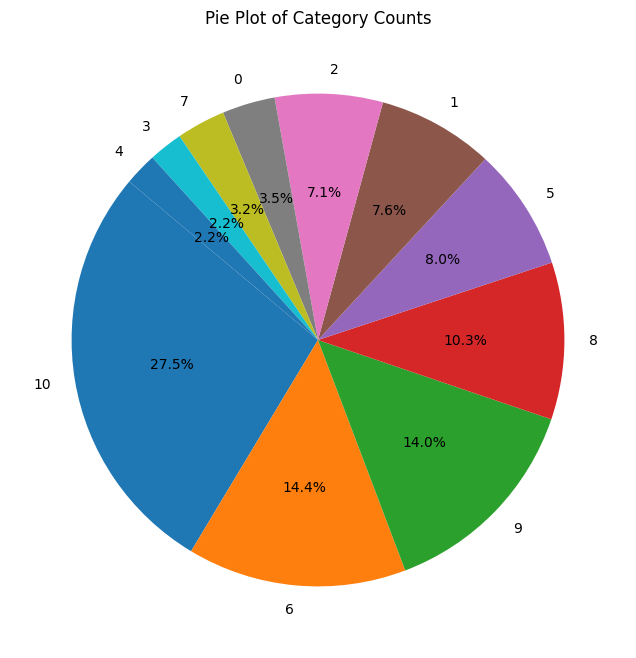

In [ ]:
category_counts = data['Class'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Plot of Category Counts')
plt.show()

## Feature sellection and data splitting




In [ ]:
columns_to_drop = ['Artist Name' , 'key' , 'mode' , 'instrumentalness' , 'liveness' , 'tempo' , 'time_signature']
final_data1 = data_robustscaler_filtered.drop(columns = columns_to_drop)
final_data2 = data_std_scaler_filtered.drop(columns = columns_to_drop)
final_data3 =  data_robustscaler.drop(columns = columns_to_drop)
final_data4 =  data_std_scaler.drop(columns = columns_to_drop)


In [ ]:
from sklearn.model_selection import train_test_split

y = data['Class']
X = data.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, f1_score

# param_grid = {
#     'C': [0.01, 0.1, 1, 10],
#     'solver': ['lbfgs', 'saga','newton-cg'],
#     'penalty': ['l1','l2','elasticnet',],
#     'max_iter': [100  , 500, 1000]
# }

# grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial'),param_grid,cv=5,scoring='f1_weighted'  )

# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)

# print("Best F1 Score: ", grid_search.best_score_)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# f1_micro = f1_score(y_test, y_pred, average='micro')
# f1_macro = f1_score(y_test, y_pred, average='macro')
# f1_weighted = f1_score(y_test, y_pred, average='weighted')

# print(f'Micro-Averaged F1 Score: {f1_micro:.2f}')
# print(f'Macro-Averaged F1 Score: {f1_macro:.2f}')
# print(f'Weighted F1 Score: {f1_weighted:.2f}')

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

## Support Vector Machines (SVM)

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# from sklearn.metrics import classification_report, f1_score

# param_grid = {
#     'C': [0.1, 1, 10 ],
#     'kernel': ['linear', 'rbf' ],
#     'gamma': ['scale', 'auto']
# }

# grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_weighted')

# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# f1_micro = f1_score(y_test, y_pred, average='micro')
# f1_macro = f1_score(y_test, y_pred, average='macro')
# f1_weighted = f1_score(y_test, y_pred, average='weighted')

# print(f'Micro-Averaged F1 Score: {f1_micro:.2f}')
# print(f'Macro-Averaged F1 Score: {f1_macro:.2f}')
# print(f'Weighted F1 Score: {f1_weighted:.2f}')

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

## Decision Trees

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, f1_score

# dt_classifier = DecisionTreeClassifier()

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# print("Best Parameters:", best_params)

# y_pred = best_model.predict(X_test)

# f1_macro = f1_score(y_test, y_pred, average='macro')
# print(f'Macro-Averaged F1 Score: {f1_macro:.2f}')

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

## Random forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, f1_score
# from sklearn.metrics import classification_report, accuracy_score

# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid , scoring='f1_weighted', cv=5,  n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)


# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best F1 Score: {grid_search.best_score_}")

# best_rf = grid_search.best_estimator_
# y_pred_best = best_rf.predict(X_test)

# print(f"F1 Score after tuning: {f1_score(y_test, y_pred_best, average='macro')}")
# print(classification_report(y_test, y_pred_best))

## XGBoost

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, f1_score
# from sklearn.metrics import classification_report, accuracy_score

# xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='f1_macro', cv=3, verbose=1)

# grid_search.fit(X_train, y_train)


# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best F1 Score: {grid_search.best_score_}")

# best_xgb_clf = grid_search.best_estimator_
# y_pred_best = best_xgb_clf.predict(X_test)

# print(f"F1 Score after tuning: {f1_score(y_test, y_pred_best, average='macro')}")
# print(classification_report(y_test, y_pred_best))

## Tpot initialization

In [ ]:
pip install --upgrade pip setuptools wheel

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-72.2.0-py3-none-any.whl.metadata (6.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-72.2.0-py3-none-any.whl (2.3 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)


In [ ]:
pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 51.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=fc203291e3c0275b08f75f57a6d279b9311572153a9dbf299c314d94f763f97a
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is n

In [ ]:
!pip install --upgrade tpot scikit-learn

## Tpot model

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier



pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('pca', PCA(n_components=0.95)),
     ('tpot', TPOTClassifier(verbosity=2, generations=2, population_size=20, random_state=42))
 ])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Test F1 Score: {f1}")


pipeline.named_steps['tpot'].export('tpot_classification_pipeline.py')

Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5167594653109471

Generation 2 - Current best internal CV score: 0.5167594653109471

Best pipeline: MLPClassifier(input_matrix, alpha=0.001, learning_rate_init=0.001)
Test F1 Score: 0.4821967885271841


In [ ]:
from sklearn.neural_network import MLPClassifier
exported_pipeline = MLPClassifier(alpha=0.001,learning_rate_init=0.001)

if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 35)


exported_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, random_state=35)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


F1 Score: 0.4821967885271841


In [ ]:
ID_test = data_test['Id']

sub = pd.DataFrame({'Id': ID_test, 'Class': results})
sub.to_csv('submission.csv', index=False)

KeyError: 'Id'

In [ ]:
y_pred = exported_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")

In [ ]:
# import autosklearn.classification

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# y_pred = model.predict(X_test)

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

## Pycaret

In [ ]:
#!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.classification import *

clf_setup = setup(data=final_data4, target='Class', session_id=42 ,fold=5)


,Description,Value
0,Session id,42
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(14396, 10)"
4,Transformed data shape,"(14396, 10)"
5,Transformed train set shape,"(10077, 10)"
6,Transformed test set shape,"(4319, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models(sort='F1')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5204,0.0000,0.5204,0.4919,0.4955,0.4234,0.4299,28.6980
rf,Random Forest Classifier,0.5051,0.8118,0.5051,0.4812,0.4874,0.4081,0.4118,3.5800
lightgbm,Light Gradient Boosting Machine,0.5020,0.8306,0.5020,0.4817,0.4859,0.4043,0.4078,7.7660
xgboost,Extreme Gradient Boosting,0.4964,0.8252,0.4964,0.4794,0.4836,0.3994,0.4018,2.8140
et,Extra Trees Classifier,0.5024,0.7779,0.5024,0.4775,0.4817,0.4029,0.4078,2.1260
lr,Logistic Regression,0.4801,0.0000,0.4801,0.4366,0.4401,0.3690,0.3810,1.9040
knn,K Neighbors Classifier,0.4360,0.7540,0.4360,0.4317,0.4325,0.3409,0.3412,0.4840
qda,Quadratic Discriminant Analysis,0.4657,0.0000,0.4657,0.4297,0.4298,0.3634,0.3700,0.0600
lda,Linear Discriminant Analysis,0.4714,0.0000,0.4714,0.4229,0.4295,0.3621,0.3725,0.0520
nb,Naive Bayes,0.4278,0.7795,0.4278,0.4158,0.3880,0.3224,0.3291,0.0720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(best_model, optimize='F1')

evaluate_model(tuned_model)

predictions = predict_model(tuned_model)
print(predictions)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5203,0.0000,0.5203,0.4928,0.4979,0.4230,0.4290
1,0.5124,0.0000,0.5124,0.4877,0.4926,0.4140,0.4190
2,0.5251,0.0000,0.5251,0.4945,0.5004,0.4298,0.4354
3,0.5141,0.0000,0.5141,0.4896,0.4935,0.4158,0.4212
4,0.5201,0.0000,0.5201,0.5014,0.5006,0.4219,0.4281
Mean,0.5184,0.0000,0.5184,0.4932,0.4970,0.4209,0.4265
Std,0.0046,0.0000,0.0046,0.0047,0.0034,0.0056,0.0058


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5198,0.8415,0.5198,0.4899,0.4965,0.4235,0.4290


       Track Name  Popularity  danceability    energy  loudness  speechiness  \
6342     1.695684   -0.495200     -0.405443 -0.616300 -0.626081    -0.589295   
5796    -0.260837   -0.495200     -0.689411 -0.658680  0.015245    -0.071408   
4332     0.109861   -0.669460      1.268159 -0.773106 -0.131161    -0.430758   
13067    0.266371    1.537830     -0.097307  0.540680  0.402456    -0.016214   
9460    -1.355290   -0.379027     -0.906919  1.163668  1.069415     0.082432   
...           ...         ...           ...       ...       ...          ...   
967     -1.065508   -0.959892      0.464589 -0.209450  0.326049     0.385413   
4846     1.647807   -0.495200     -2.024668  0.138068  0.111123    -0.424887   
14171   -0.977593   -0.959892     -1.819244  1.210287  0.467771    -0.166530   
11165   -1.287814   -1.076066      1.111070  0.587298  0.329992    -0.581075   
13530    1.702963   -0.553287     -0.363150 -0.955341 -0.365804    -0.414318   

       acousticness   valence  duration



## MLJAR



In [ ]:
#!pip install mljar-supervised


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised-1.1.9-py3-none-any.whl size=164069 sha256=77d05adeac27317a9f4e4bfbc6448c65251cfc51b4ee5c43c3e8322a9576bf1b
  Stored in directory: /root/.cache/pip/wheels/11/05/00/2a696e924a8d0bb5cb3ecfc0640ba128c4bdf3891a85770407
 

In [ ]:
from supervised.automl import AutoML


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.



In [ ]:
automl = AutoML(
    mode="Compete",
    total_time_limit=3600,
    eval_metric="f1"
)

In [ ]:
automl.fit(X, y)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric f1
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree f1 0.384028 trained in 2.13 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 3 models
1_DecisionTree f1 0.379967 trained in 11.97 seconds
2_DecisionTree f1 0.416088 trained in 7.19 seconds
3_DecisionTree f1 0.4160

## H2o

In [ ]:
#pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375571 sha256=1ef1f6e2d9c6aada5f46e8c9cb13bdc706c5ccc64230f32159aa581924c79ae7
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

df_h2o = h2o.H2OFrame(data)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvzn30ie1
  JVM stdout: /tmp/tmpvzn30ie1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvzn30ie1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_y1p15r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target = 'Class'
features = df_h2o.columns
features.remove(target)

df_h2o[target] = df_h2o[target].asfactor()


In [ ]:
train, test = df_h2o.split_frame(ratios=[.8], seed=1234)

In [ ]:
aml = H2OAutoML(max_models=20, seed=1, sort_metric="mean_per_class_error", nfolds=5)
aml.train(x=features, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),20/20
# GBM base models (used / total),7/7
# XGBoost base models (used / total),6/6
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),4/4
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
best_model = aml.leader

perf = best_model.model_performance(test_data=test)



perf = best_model.model_performance(test)




In [ ]:
predictions = best_model.predict(test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
# Convert H2OFrame to pandas DataFrame
y_pred = predictions['predict'].as_data_frame()
y_true = test[target].as_data_frame()


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred, average='weighted')  # You can also use 'macro' or 'micro'
print(f"Weighted F1 score: {f1}")


Weighted F1 score: 0.5583406972428557


# Apply on test data

In [ ]:
data_test = pd.read_csv("/kaggle/input/music-genre-classification-2024/test (2).csv")
ID = data_test['Id']
data_test.drop(['Id'], axis=1, inplace = True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         3600 non-null   object 
 1   Track Name          3600 non-null   object 
 2   Popularity          3505 non-null   float64
 3   danceability        3600 non-null   float64
 4   energy              3600 non-null   float64
 5   key                 3195 non-null   float64
 6   loudness            3600 non-null   float64
 7   mode                3600 non-null   int64  
 8   speechiness         3600 non-null   float64
 9   acousticness        3600 non-null   float64
 10  instrumentalness    2764 non-null   float64
 11  liveness            3600 non-null   float64
 12  valence             3600 non-null   float64
 13  tempo               3600 non-null   float64
 14  duration_in min/ms  3600 non-null   float64
 15  time_signature      3600 non-null   int64  
dtypes: flo

In [ ]:
data_test.isna().sum()

,0
Artist Name,0
Track Name,0
Popularity,95
danceability,0
energy,0
key,405
loudness,0
mode,0
speechiness,0
acousticness,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Artist Name' , 'Track Name']


encoder = LabelEncoder()
for col in columns_to_encode:
  data_test[col] = encoder.fit_transform(data_test[col])

In [ ]:
data_test['instrumentalness'].fillna(data_test['instrumentalness'].median() , inplace = True)
data_test['key'].fillna(data_test['key'].mode()[0] , inplace = True)
data_test['Popularity'].fillna(data_test['Popularity'].mean(),inplace = True)

In [ ]:
if not isinstance(data_test, h2o.H2OFrame):
    data_test = h2o.H2OFrame(data_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
predictions=best_model.predict(data_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
predictions = predictions['predict'].as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
submission = pd.DataFrame({'Id': ID,'Class': predictions['predict']})

In [ ]:
submission['Id'].duplicated().sum()

0

In [ ]:
submission.head()

,Id,Class
0,14397,9
1,14398,6
2,14399,9
3,14400,10
4,14401,5


In [ ]:
submission.to_csv('submission.csv',index=None)